# Implement visualization of the solution using a library such as matplotlib, displaying the accuracy, error with respect to epochs for both train and test data.

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:00<00:00, 49593254.29it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 2592968.17it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:00<00:00, 4705164.94it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 4394585.64it/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw

Epoch 1/10 - Train Loss: 0.4069, Train Accuracy: 87.87% - Test Loss: 0.2218, Test Accuracy: 93.45%
Epoch 2/10 - Train Loss: 0.2014, Train Accuracy: 93.99% - Test Loss: 0.1682, Test Accuracy: 94.75%
Epoch 3/10 - Train Loss: 0.1420, Train Accuracy: 95.72% - Test Loss: 0.1356, Test Accuracy: 95.68%
Epoch 4/10 - Train Loss: 0.1149, Train Accuracy: 96.43% - Test Loss: 0.1445, Test Accuracy: 95.49%
Epoch 5/10 - Train Loss: 0.0977, Train Accuracy: 96.94% - Test Loss: 0.1016, Test Accuracy: 96.74%
Epoch 6/10 - Train Loss: 0.0847, Train Accuracy: 97.33% - Test Loss: 0.1078, Test Accuracy: 96.62%
Epoch 7/10 - Train Loss: 0.0780, Train Accuracy: 97.52% - Test Loss: 0.1174, Test Accuracy: 96.59%
Epoch 8/10 - Train Loss: 0.0683, Train Accuracy: 97.86% - Test Loss: 0.0980, Test Accuracy: 97.04%
Epoch 9/10 - Train Loss: 0.0626, Train Accuracy: 97.94% - Test Loss: 0.0792, Test Accuracy: 97.63%
Epoch 10/10 - Train Loss: 0.0553, 

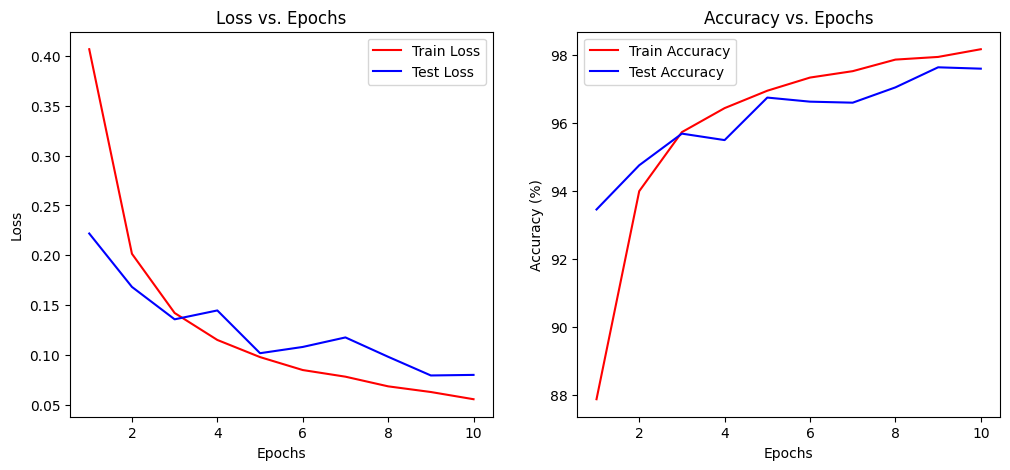

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

# 1. Data Loading and Preprocessing

# Define transformations for the training and test sets
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))  # Normalizing the images
])

# Download and load the training and test datasets
train_dataset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)

# Create data loaders for the datasets
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

# 2. Define the Neural Network Model
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 128)  # Input layer (784 nodes), hidden layer (128 nodes)
        self.fc2 = nn.Linear(128, 64)       # Hidden layer (128 nodes), hidden layer (64 nodes)
        self.fc3 = nn.Linear(64, 10)        # Hidden layer (64 nodes), output layer (10 nodes for 10 classes)
        self.relu = nn.ReLU()               # Activation function
        self.softmax = nn.LogSoftmax(dim=1) # Output layer's activation function (LogSoftmax for multi-class classification)
    def forward(self, x):
        x = x.view(-1, 28 * 28)  # Flatten the image into a 784-dimensional vector
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.fc3(x)
        return self.softmax(x)
# 3. Instantiate the Model, Define Loss Function and Optimizer
model = SimpleNN()
criterion = nn.NLLLoss()  # Negative Log-Likelihood Loss
optimizer = optim.Adam(model.parameters(), lr=0.001)  # Adam optimizer
# 4. Train the Model with Recording Metrics
def train_model(model, train_loader, test_loader, criterion, optimizer, epochs=5):
    train_losses, test_losses = [], []
    train_accuracies, test_accuracies = [], []
    for epoch in range(epochs):
        running_loss = 0
        correct_train = 0
        total_train = 0
        # Training phase
        model.train()
        for images, labels in train_loader:
            optimizer.zero_grad()  # Zero the gradients
            # Forward pass
            output = model(images)
            loss = criterion(output, labels)
            # Backward pass and optimization
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
            # Calculate accuracy
            _, predicted = torch.max(output, 1)
            total_train += labels.size(0)
            correct_train += (predicted == labels).sum().item()

        train_loss = running_loss / len(train_loader)
        train_accuracy = 100 * correct_train / total_train
        train_losses.append(train_loss)
        train_accuracies.append(train_accuracy)

        # Evaluation phase
        model.eval()
        running_test_loss = 0
        correct_test = 0
        total_test = 0
        with torch.no_grad():
            for images, labels in test_loader:
                output = model(images)
                loss = criterion(output, labels)
                running_test_loss += loss.item()

                _, predicted = torch.max(output, 1)
                total_test += labels.size(0)
                correct_test += (predicted == labels).sum().item()

        test_loss = running_test_loss / len(test_loader)
        test_accuracy = 100 * correct_test / total_test
        test_losses.append(test_loss)
        test_accuracies.append(test_accuracy)

        print(f"Epoch {epoch + 1}/{epochs} - "
              f"Train Loss: {train_loss:.4f}, Train Accuracy: {train_accuracy:.2f}% - "
              f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.2f}%")

    return train_losses, test_losses, train_accuracies, test_accuracies
# 5. Visualize the Metrics
def plot_metrics(train_losses, test_losses, train_accuracies, test_accuracies):
    epochs = range(1, len(train_losses) + 1)

    plt.figure(figsize=(12, 5))
    # Plot loss
    plt.subplot(1, 2, 1)
    plt.plot(epochs, train_losses, 'r', label='Train Loss')
    plt.plot(epochs, test_losses, 'b', label='Test Loss')
    plt.title('Loss vs. Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    # Plot accuracy
    plt.subplot(1, 2, 2)
    plt.plot(epochs, train_accuracies, 'r', label='Train Accuracy')
    plt.plot(epochs, test_accuracies, 'b', label='Test Accuracy')
    plt.title('Accuracy vs. Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy (%)')
    plt.legend()

    plt.show()
# Example usage
if __name__ == "__main__":
    # Train the model and capture the metrics
    train_losses, test_losses, train_accuracies, test_accuracies = train_model(
        model, train_loader, test_loader, criterion, optimizer, epochs=10
    )

    # Visualize the metrics
    plot_metrics(train_losses, test_losses, train_accuracies, test_accuracies)
